In [89]:
import numpy as np
import matplotlib.pyplot as plt
import abc

In [90]:
class PowerIteration:
    """
    PowerIteration class for finding the dominant eigenvector and eigenvalue of a square matrix using power iteration.

    Parameters:
    - A (numpy.ndarray): The square matrix for which to find the eigenvector and eigenvalue.
    - x0 (numpy.ndarray): The initial guess for the eigenvector.
    - tol (float): Convergence tolerance. The iteration stops if the change in eigenvalue is below this threshold.
    
    Attributes:
    - A (numpy.ndarray): The input matrix.
    - x0 (numpy.ndarray): The initial guess for the eigenvector.
    - tol (float): Convergence tolerance.
    - x (numpy.ndarray): Current estimate of the eigenvector.
    - lamda (float): Current estimate of the eigenvalue.
    - converged (bool): True if convergence criteria are met, False otherwise.
    - iteration (int): Number of iterations performed.
    - errors (numpy.ndarray): Array containing errors in eigenvalue estimates over multiple calls.

    Methods:
    - step(): Perform one iteration of power iteration.
    - __call__(iterations, true_lamda=None): Perform multiple iterations of power iteration.

    Usage:
    ```
    # Example usage:
    A = your_matrix
    x0 = your_initial_guess
    pi = PowerIteration(A, x0)
    pi(iterations=100, true_lamda=desired_eigenvalue)
    print(pi.lamda)  # Access the estimated eigenvalue
    print(pi.x)      # Access the estimated eigenvector
    print(pi.errors)  # Access the errors in eigenvalue estimates
    ```
    """
    def __init__(self, A, x0, tol=np.finfo(float).eps):
        self.A = A
        self.x0 = x0.copy()
        self.tol = tol
        self.x = self.x0.copy()
        self.lamda = 0
        self.converged = False
        self.iteration = 0
        self.errors = np.array([])

    def step(self):
        """
        Perform one iteration of power iteration.
        Updates the eigenvector and eigenvalue estimates.
        """
        self.x = self.A @ self.x
        self.x = self.x / np.linalg.norm(self.x)
        lamda = np.dot(self.x, self.A @ self.x)
        if np.abs(lamda - self.lamda) < self.tol:
            self.converged = True
        self.lamda = lamda

    def __call__(self, iterations, true_lamda: float | None = None):
        """
        Perform multiple iterations of power iteration.

        Parameters:
        - iterations (int): The number of iterations to perform.
        - true_lamda (float): The true eigenvalue for error calculation (optional).

        If true_lamda is provided, errors in eigenvalue estimates will be accumulated in the errors attribute.
        """
        iteration = 0
        if true_lamda is None:
            while iteration < iterations and not self.converged:
                self.step()
                iteration += 1
                self.iteration += 1
        elif not isinstance(true_lamda, float):
            print("Invalid true_lamda")
        else:
            errors = np.zeros(iterations)
            while iteration < iterations and not self.converged:
                self.step()
                errors[iteration] = np.abs(self.lamda - true_lamda)
                iteration += 1
                self.iteration += 1
            self.errors = np.hstack((self.errors, errors))


        


In [91]:
import numpy as np

class InversePowerIteration:
    """
    InversePowerIteration class for finding the eigenvector and eigenvalue of a matrix close to a given target value.

    Parameters:
    - A (numpy.ndarray): The square matrix for which to find the eigenvector and eigenvalue.
    - x0 (numpy.ndarray): The initial guess for the eigenvector.
    - shift (float): The shift to apply to the matrix, making the target eigenvalue the dominant one.
    - tol (float): Convergence tolerance. The iteration stops if the change in eigenvalue is below this threshold.
    
    Attributes:
    - A (numpy.ndarray): The input matrix.
    - x0 (numpy.ndarray): The initial guess for the eigenvector.
    - shift (float): The shift applied to the matrix.
    - tol (float): Convergence tolerance.
    - x (numpy.ndarray): Current estimate of the eigenvector.
    - eigenvalue (float): Current estimate of the eigenvalue.
    - converged (bool): True if convergence criteria are met, False otherwise.
    - iteration (int): Number of iterations performed.

    Methods:
    - step(): Perform one iteration of inverse power iteration.
    - __call__(iterations): Perform multiple iterations of inverse power iteration.

    Usage:
    ```
    # Example usage:
    A = your_matrix
    x0 = your_initial_guess
    shift_value = desired_shift
    ipi = InversePowerIteration(A, x0, shift=shift_value)
    ipi(iterations=100)
    print(ipi.eigenvalue)  # Access the estimated eigenvalue
    print(ipi.x)           # Access the estimated eigenvector
    ```
    """
    def __init__(self, A, x0, shift=0.0, tol=np.finfo(float).eps):
        self.A = A
        self.shift = shift
        self.D = self.A - self.shift * np.eye(self.A.shape[0])
        self.x0 = x0.copy()
        self.tol = tol
        self.x = self.x0.copy()
        self.eigenvalue = 0
        self.converged = False
        self.iteration = 0
        self.errors = np.array([])

    def step(self):
        """
        Perform one iteration of inverse power iteration.
        Updates the eigenvector and eigenvalue estimates.
        """
        self.x = np.linalg.solve(self.D, self.x)
        self.x = self.x / np.linalg.norm(self.x)
        eigenvalue = np.dot(self.x, self.A @ self.x)
        if np.abs(eigenvalue - self.eigenvalue) < self.tol:
            self.converged = True
        self.eigenvalue = eigenvalue

    def __call__(self, iterations, true_eigenvalue):
        """
        Perform multiple iterations of inverse power iteration.

        Parameters:
        - iterations (int): The number of iterations to perform.
        """
        iteration = 0
        if true_eigenvalue is None:
            while iteration < iterations and not self.converged:
                self.step()
                iteration += 1
                self.iteration += 1
        elif not isinstance(true_eigenvalue, float):
            print("Invalid true_lamda")
        else:
            errors = np.zeros(iterations)
            while iteration < iterations and not self.converged:
                self.step()
                errors[iteration] = np.abs(self.eigenvalue - true_eigenvalue)
                iteration += 1
                self.iteration += 1
            self.errors = np.hstack((self.errors, errors))


In [93]:
A = np.array([[1,5],[5,6]])
TRUE_EIGENVALS = np.linalg.eigvals(A)
TRUE_EIGENVALS.sort()
TRUE_EIGENVALS = TRUE_EIGENVALS[::-1]
TRUE_EIGENVALS

array([ 9.09016994, -2.09016994])

In [94]:
x0 = np.array([0.2,0.7])

In [95]:
p0 = PowerIteration(A,x0)
p0(16, true_lamda=TRUE_EIGENVALS[0])
p1 = InversePowerIteration(A,x0)
p1(16, true_eigenvalue=TRUE_EIGENVALS[1])

In [107]:
x = np.linspace(0,16)
r = np.abs(TRUE_EIGENVALS[1]/TRUE_EIGENVALS[0])/4 # Why???
y = r**x

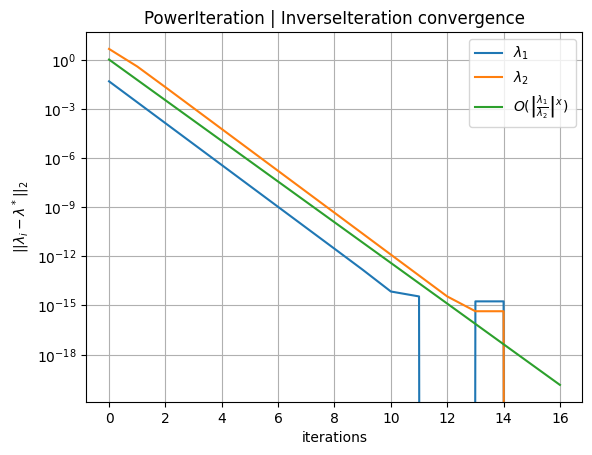

In [108]:
fig, ax = plt.subplots(1,1)
ax.plot(p0.errors, label=r"$\lambda_1$ ")
ax.plot(p1.errors, label=r"$\lambda_2$ ")
ax.plot(x,y, label=r"$O(\left|\frac{\lambda_1}{\lambda_2}\right|^x)$ ")
ax.set(yscale='log', xlabel='iterations', ylabel=r'$||\lambda_{i}-\lambda^*||_2$',
       title='PowerIteration | InverseIteration convergence')
ax.grid()
ax.legend()